#MNIST CV Project - DNN & ConvNet Basics

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

Import Libs
 - Tensorflow as tf
 - keras
 - numpy
 - matplotlib.pyplot as plt
 - from keras import backend as K

In [0]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from keras import backend as K

##Init variable
 - batch_size 
 - num_classes 
 - epochs 

 - input image dimensions

In [0]:
batch_size = 10
num_classes = 10
epochs = 3

img_rows, img_cols = 28, 28

#Gather Data
Download Dataset from [Keras Dataset](https://keras.io/datasets/)

tf.keras.datasets.mnist

Use load_data() to split:
- train_input & train_output
- test_input & test_output

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
 

Print training input & output shape & size:

- .shape
- .size

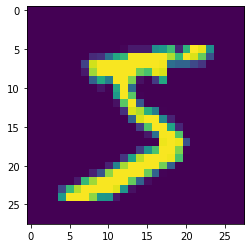

In [29]:
plt.figure()
plt.imshow(x_train[0])
plt.show()

#Prepare Data
##Understand Data: 
Plot one of the sample img and its coresponding ground truth

[Model Visualization](https://keras.io/visualization/#model-visualization)

- Plot x_train[0] 
- Print y_train[0]

In [30]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [0]:
x_train, x_test = x_train/255, x_test/255

##Normalization: 
Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

After Normalization, Plot first 10 to see result

Try to use for loop to Plot



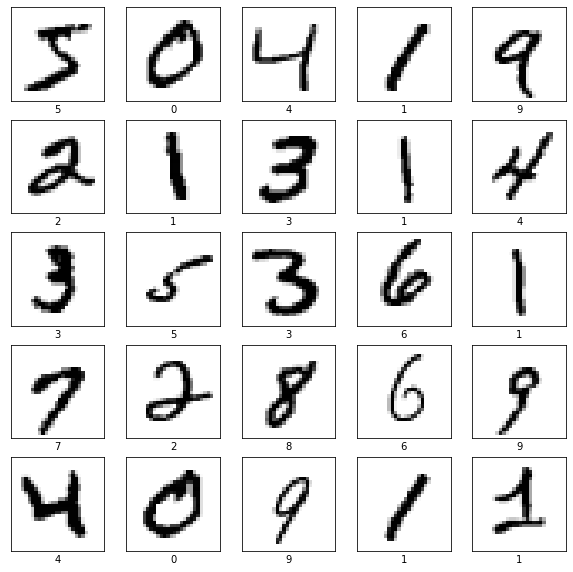

In [31]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(y_train[i])
plt.show()



#Build Model
Layer Design:
Option 1: FC DNN 
- Flatten: [Flatten](https://keras.io/layers/core/#flatten) the input. Does not affect the batch size. Input_Shape!
- Dense: Just your regular densely-connected NN layer. 128 nodes, relu activation
- Dropout: [Dropout](https://keras.io/layers/core/#dropout), rate = 0.2. consists in randomly setting a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting.

[Keras Core Layers](https://keras.io/layers/core/)

In [0]:
def create_model():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
  model.add(tf.keras.layers.Dense(128, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(10, activation='softmax'))

  return model

#Compile model
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:
[Keras Model Compile](https://keras.io/models/model/)

1. Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
Using [Sparse_Categorical_Crossentropy](https://www.dlology.com/blog/how-to-use-keras-sparse_categorical_crossentropy/)

2. Optimizer —This is how the model is updated based on the data it sees and its loss function.

3. Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

[How to choose loss function](https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/)

 [Adam Optimization Algo](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)




In [0]:
model = create_model()
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



#[Summary Model Info](https://keras.io/models/about-keras-models/)


In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.



[Keras Model.fit()](https://keras.rstudio.com/reference/fit.html)

- Epoch: 1 pass through all rows in training data set
- Batch: one or more samples considered by the model within an epoch before weights are updated
- Verbose: Verbosity mode (0 = silent, 1 = progress bar, 2 = one line per epoch).
- Validation_split: 	
Float between 0 and 1. Fraction of the training data to be used as validation data.

In [36]:
history = model.fit(x_train, y_train, epochs=5,verbose=2,validation_split=0.5)


Epoch 1/5
938/938 - 2s - loss: 3.9166 - accuracy: 0.7244 - val_loss: 0.7926 - val_accuracy: 0.8361
Epoch 2/5
938/938 - 2s - loss: 0.7511 - accuracy: 0.8071 - val_loss: 0.5932 - val_accuracy: 0.8668
Epoch 3/5
938/938 - 2s - loss: 0.5980 - accuracy: 0.8410 - val_loss: 0.5174 - val_accuracy: 0.8844
Epoch 4/5
938/938 - 2s - loss: 0.5179 - accuracy: 0.8622 - val_loss: 0.4440 - val_accuracy: 0.8981
Epoch 5/5
938/938 - 2s - loss: 0.5014 - accuracy: 0.8704 - val_loss: 0.3921 - val_accuracy: 0.9153


#Evaluate Model

[Keras Evaluate Model](https://keras.io/models/model/#evaluate)

1. You ask the model to make predictions about a test set—in this example, the `test_images` array.
2. Verify that the predictions match the labels from the `test_labels` array.

In [37]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3814 - accuracy: 0.9170


[0.38139134645462036, 0.9169999957084656]

#Predict the result

Pick one test data and use plt.figure() & imshow() to plot

In [38]:
result = model.predict(img)

print(result)

NameError: ignored

tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [40]:
img=(np.expand_dims(img,[0]))

NameError: ignored

Use np.expand_dims() [link text](https://docs.scipy.org/doc/numpy/reference/generated/numpy.expand_dims.html) to convert img to list


#Predict
[Keras Predic](https://keras.io/models/model/#predict)
 Print result

In [20]:
result = model.predict(img) 

print(result)

NameError: ignored

##Understanding Result Array:
each element in result array represent the possibility of img coresponding to the numbers:
e.g. result[0] = 0.113 means the possibility of target img representing 1 = 11.3% etc.
The final decision is made by outputing the highest possibility which indicate the number the img presenting 

model.predict returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

numpy.argmax(a, axis=None, out=None)

[numpy.argmax](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html)
Returns the indices of the maximum values along an axis.

In [0]:
np.argmax(result)

2

Reference
[MINIST_Project](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb#scrollTo=h3IKyzTCDNGo)